# The goal of predicting term deposit subscriptions is to identify whether a customer will subscribe to a term deposit offered by a bank or financial institution.

In [1]:
# Depositors often prefer term deposits because they pay more intrest than traditional savings account

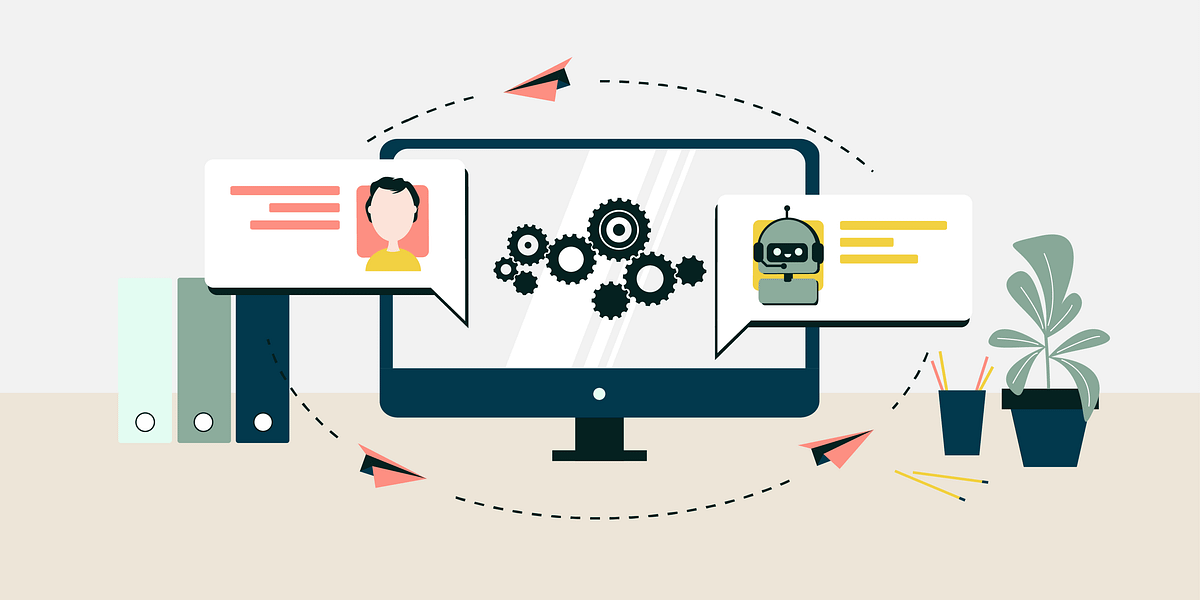

In [1]:
from IPython.display import Image
Image("C:/Users/Sudheer/New folder/Machine_Learning/unsupervised_ML/Predicting Term Deposit Suscriptions/pic.png")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
df.shape

(11162, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
cat_col = df.select_dtypes(include=['object'])
cat_col

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [14]:
# one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_col.columns, drop_first=True)
df_encoded.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')

In [15]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

([<matplotlib.patches.Wedge at 0x2a43e65b460>,
 [Text(0.8253801087750839, 0.7271503806218015, 'management'),
  Text(-0.4493139099459507, 1.0040503026886065, 'blue-collar'),
  Text(-1.095569346389391, 0.09862964692181996, 'technician'),
  Text(-0.7673495359424162, -0.7881463631134504, 'admin.'),
  Text(-0.14999664626717374, -1.0897251975193565, 'services'),
  Text(0.36887490652584215, -1.0363065682198251, 'retired'),
  Text(0.6873246915735397, -0.858827554491202, 'self-employed'),
  Text(0.8549450068164426, -0.6921481310526187, 'student'),
  Text(0.976326733606755, -0.5067406725779614, 'unemployed'),
  Text(1.05533120556561, -0.31028381614166745, 'entrepreneur'),
  Text(1.0925408847166393, -0.12788438224655463, 'housemaid'),
  Text(1.0997865192964298, -0.021670532384873084, 'unknown')],
 [Text(0.45020733205913666, 0.39662748033916445, '23.0%'),
  Text(-0.24508031451597306, 0.5476638014665126, '17.4%'),
  Text(-0.5975832798487586, 0.0537979892300836, '16.3%'),
  Text(-0.41855429233222696

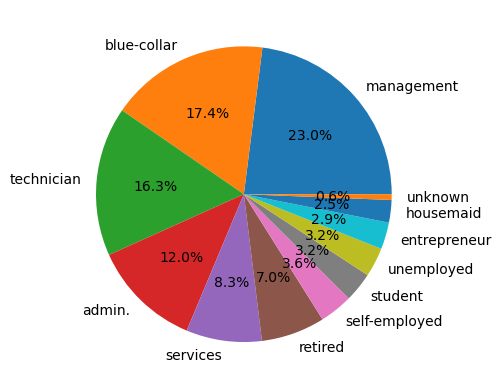

In [16]:
plt.pie(df['job'].value_counts(),labels = df['job'].value_counts().index,autopct='%1.1f%%')

<AxesSubplot:xlabel='marital', ylabel='count'>

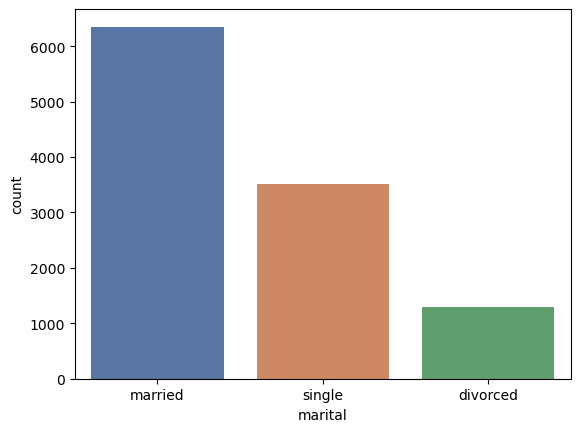

In [17]:
sns.set_palette('deep')
sns.countplot(df['marital'])

In [18]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


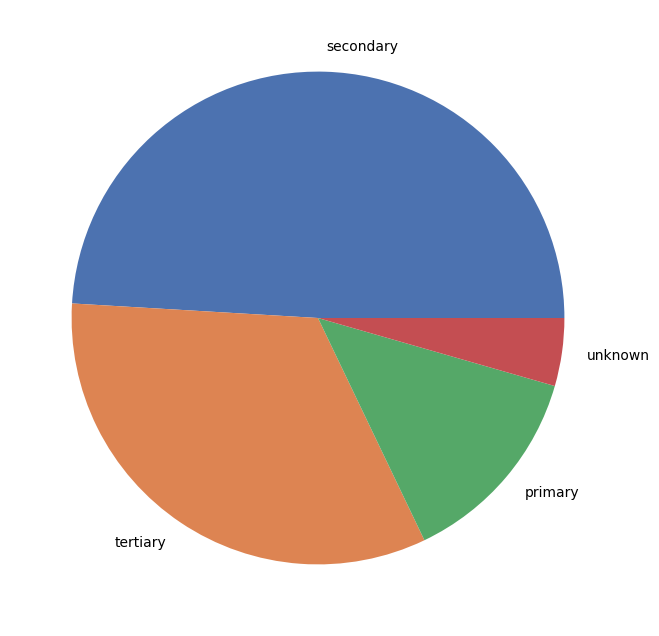

In [20]:
label_col = df['education'].value_counts().index
plt.figure(figsize=(8, 8))
plt.pie(df['education'].value_counts(),labels = label_col)
plt.show()

In [21]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

<AxesSubplot:xlabel='housing', ylabel='count'>

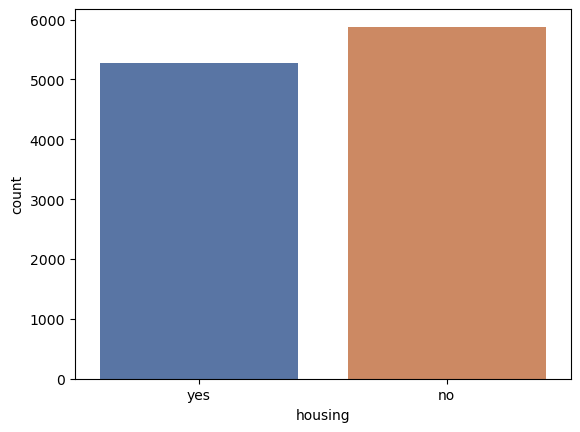

In [22]:
sns.countplot(df['housing'])

<AxesSubplot:xlabel='loan', ylabel='count'>

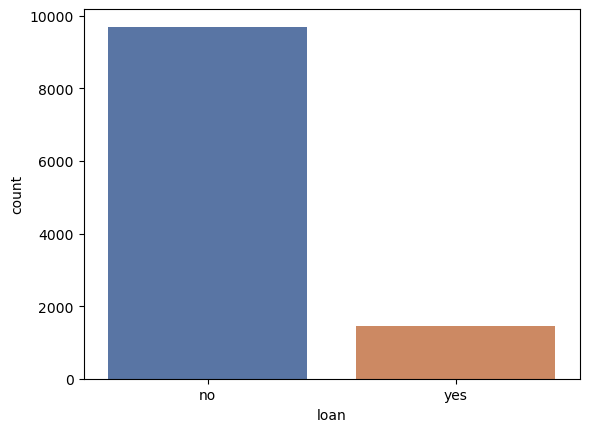

In [23]:
sns.countplot(df['loan'])

<AxesSubplot:xlabel='contact', ylabel='count'>

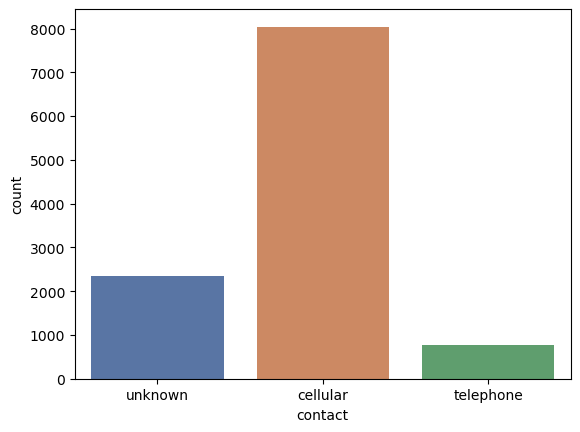

In [24]:
sns.countplot(df['contact'])

<BarContainer object of 12 artists>

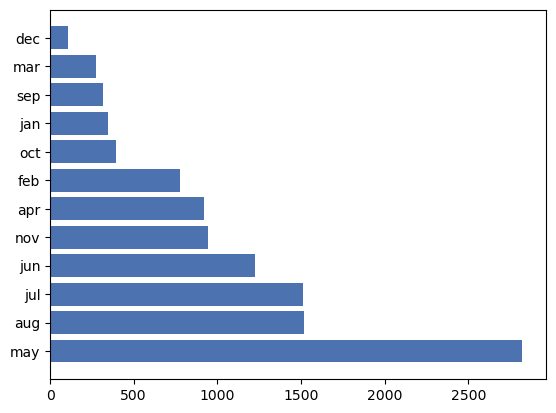

In [25]:
categories = df['month'].value_counts().index
values = df['month'].value_counts().values
#plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.barh(categories,values)

In [26]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


<AxesSubplot:xlabel='deposit', ylabel='count'>

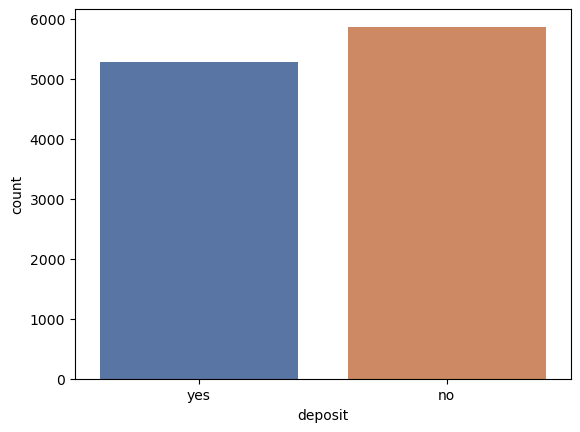

In [27]:
sns.countplot(df['deposit'])

In [28]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [29]:
#catergorical to numerical by label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in cat_col.columns:
    df[i] = labelencoder.fit_transform(df[i])
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [30]:
#split the data 
from sklearn.model_selection import train_test_split
X = df.drop('deposit', axis = 1)
y = df['deposit']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

# Model Selection and training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [32]:
lg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
svc = SVC()

In [33]:
lg.fit(x_train,y_train)

LogisticRegression()

In [34]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [37]:
svc.fit(x_train,y_train)

SVC()

In [38]:
lg_pred = lg.predict(x_train)
dtc_pred = dtc.predict(x_train)
rfc_pred = rfc.predict(x_train)
gbc_pred = gbc.predict(x_train)
svc_pred = svc.predict(x_train)

In [39]:
#evaluating the performance of training data
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score

In [40]:
predictions = [lg_pred, dtc_pred, rfc_pred, gbc_pred, svc_pred]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']
j=0
for i in predictions:
    print('----------- {} -------------'.format(model_names[j]))
    print("Accuracy = ",accuracy_score(y_train,i))
    print("Precision = ",precision_score(y_train,i))
    print("Recall = ",recall_score(y_train,i))
    print("F1_Score = ",f1_score(y_train,i))
    print("ROC_AOC_score = ",roc_auc_score(y_train,i))
    print()
    j = j+1

----------- Logistic Regression -------------
Accuracy =  0.7627953858214805
Precision =  0.7704370179948586
Recall =  0.7098531501657982
F1_Score =  0.7389053254437871
ROC_AOC_score =  0.7600678540291494

----------- Decision Tree -------------
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1_Score =  1.0
ROC_AOC_score =  1.0

----------- Random Forest -------------
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1_Score =  1.0
ROC_AOC_score =  1.0

----------- Gradient Boosting -------------
Accuracy =  0.8607906820472617
Precision =  0.8353974330105832
Recall =  0.8787304594978683
F1_Score =  0.8565162184000924
ROC_AOC_score =  0.8617149216970964

----------- Support Vector Machine -------------
Accuracy =  0.7435323104490984
Precision =  0.7813046010483401
Recall =  0.6354808147797253
F1_Score =  0.7008881922675027
ROC_AOC_score =  0.7379656039056901



# Model Evaluation and comparision

In [41]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score
models = [lg, dtc, rfc, gbc, svc]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']
acc_score = []
prec_score = []
recall = []
F1_score = []
roc_auc = []

In [42]:
for model in models:
    pred = model.predict(x_test)
    
    acc_score.append(accuracy_score(y_test,pred))
    prec_score.append(precision_score(y_test,pred))
    recall.append(recall_score(y_test,pred))
    F1_score.append(f1_score(y_test,pred))
    roc_auc.append(roc_auc_score(y_test,pred))

In [43]:
eval_df = pd.DataFrame({
    'Model' : model_names,
    'Accuracy' : acc_score,
    'Precision' : prec_score,
    'Recall Score' : recall,
    'F1 Score' : F1_score,
    'ROC AUC' : roc_auc
})
eval_df

,Model,Accuracy,Precision,Recall Score,F1 Score,ROC AUC
0,Logistic Regression,0.748768,0.749507,0.712277,0.730418,0.747219
1,Decision Tree,0.766234,0.763795,0.739456,0.751429,0.765097
2,Random Forest,0.827586,0.803922,0.845361,0.824121,0.828341
3,Gradient Boosting,0.821764,0.800539,0.835052,0.817431,0.822329
4,Support Vector Machine,0.725929,0.750275,0.639175,0.690283,0.722246


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Support Vector Machine')])

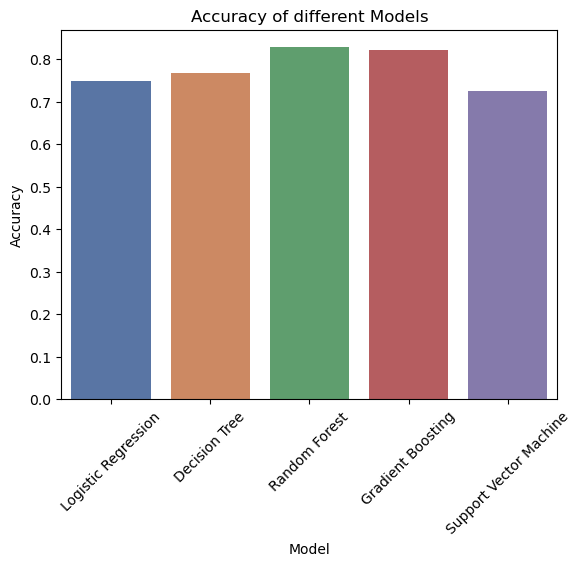

In [44]:
sns.barplot(x = 'Model', y = 'Accuracy',data = eval_df)
plt.title('Accuracy of different Models')
plt.xticks(rotation = 45)

# Logistic Regression

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

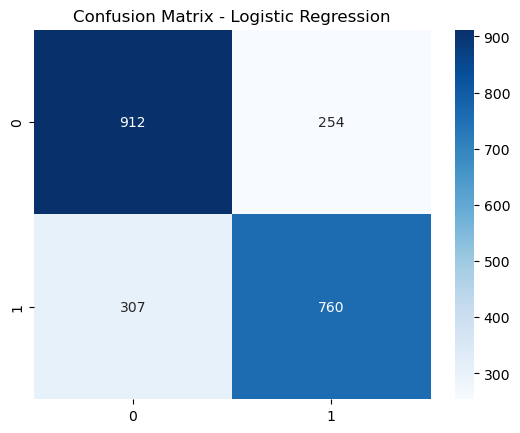

In [45]:
from sklearn.metrics import confusion_matrix

pred = lg.predict(x_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot = True,cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix - Logistic Regression')

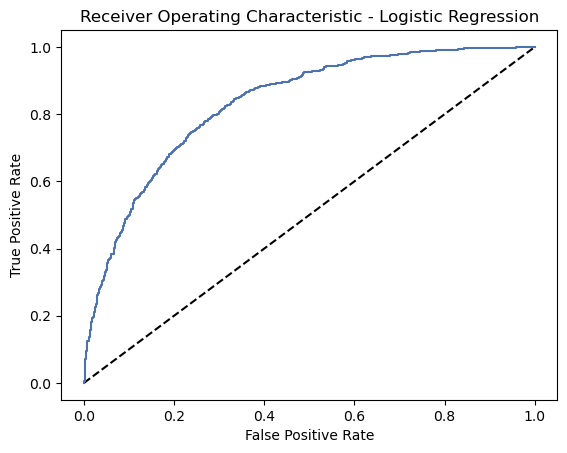

In [46]:
from sklearn.metrics import roc_curve

preds = lg.predict_proba(x_test)[:,1] # Probability of positive class
fpr, tpr, thresold = roc_curve(y_test,preds)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.show()

# Decision Tree

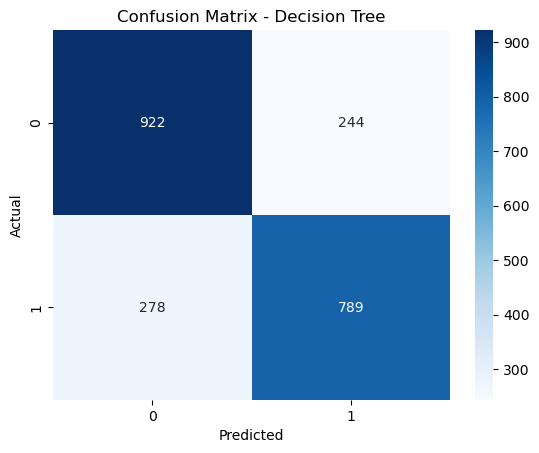

In [47]:
from sklearn.metrics import confusion_matrix
pred = dtc.predict(x_test)
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [48]:
feature_importances = dtc.feature_importances_
feature_names = X.columns

Text(0.5, 1.0, 'Feature Importance - Decision Tree')

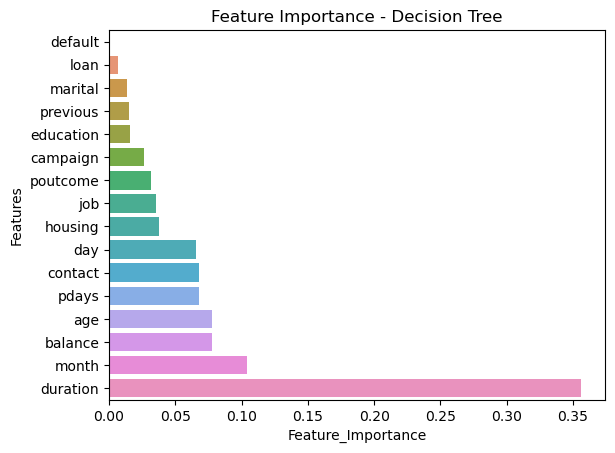

In [49]:
feature_importance_df = pd.DataFrame({
    'Features' : feature_names,
    'Feature_Importance' : feature_importances
})
feature_importance_df = feature_importance_df.sort_values('Feature_Importance', ascending = True)
# feature_importance_df

sns.barplot(x = 'Feature_Importance', y='Features', data = feature_importance_df)
plt.title('Feature Importance - Decision Tree')

# Random Forest

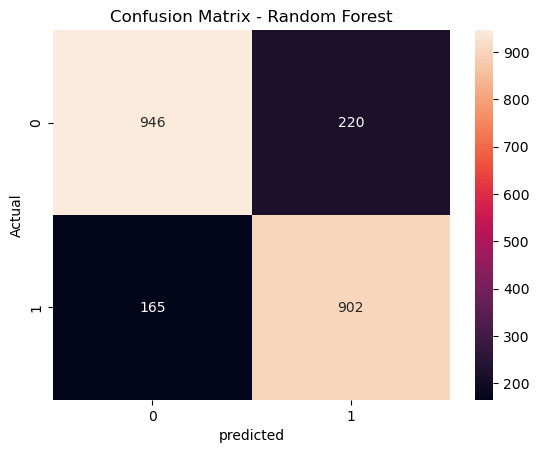

In [50]:
from sklearn.metrics import confusion_matrix

pred = rfc.predict(x_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot = True,fmt = 'd')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

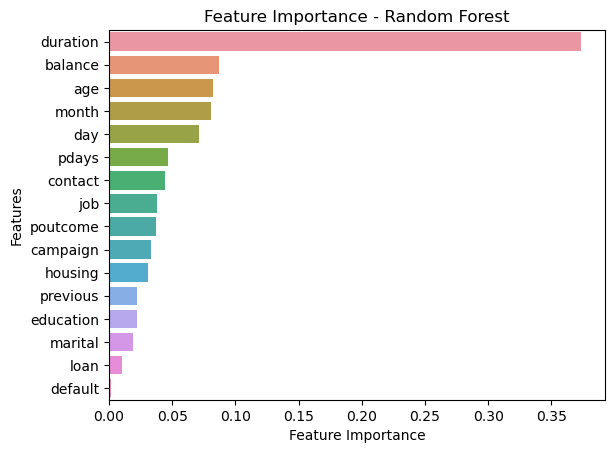

In [51]:
feature_importance = rfc.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({
    'Features' : feature_names,
    'Feature Importance' : feature_importance
})
feature_df = feature_df.sort_values('Feature Importance',ascending=False)

sns.barplot(x = 'Feature Importance', y ='Features', data = feature_df)
plt.title('Feature Importance - Random Forest')
plt.show()

# Gradient boosting

<AxesSubplot:>

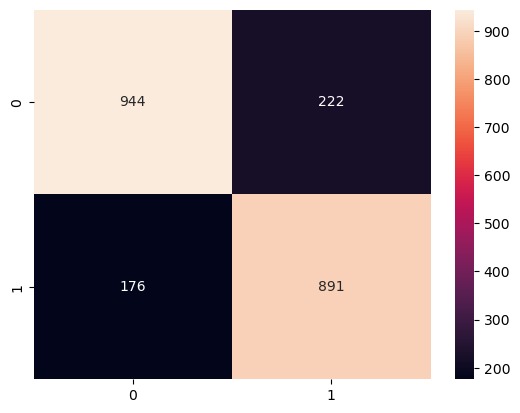

In [52]:
pred = gbc.predict(x_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt='d')

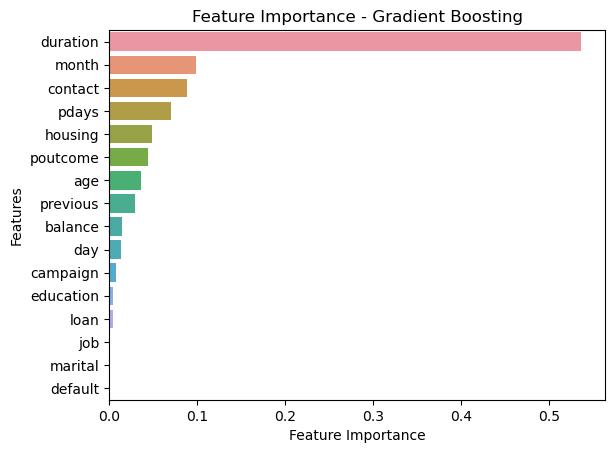

In [53]:
feature_importance = gbc.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({
    'Features' : feature_names,
    'Feature Importance' : feature_importance
})
feature_df = feature_df.sort_values('Feature Importance',ascending=False)

sns.barplot(x = 'Feature Importance', y ='Features', data = feature_df)
plt.title('Feature Importance - Gradient Boosting')
plt.show()

# Support Vectort Machine

Text(0.5, 1.0, 'Confusion Matrix - SVM')

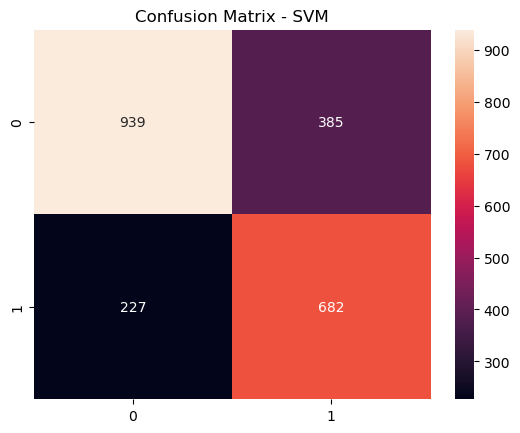

In [54]:
pred = svc.predict(x_test)
cm = confusion_matrix(pred,y_test)
sns.heatmap(cm,annot = True,fmt = 'd')
plt.title('Confusion Matrix - SVM')

Text(0.5, 1.0, 'Receiver Operating Characteristic - SVM')

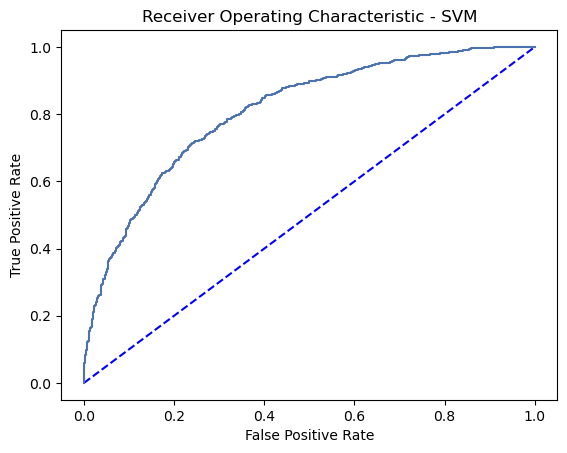

In [55]:
from sklearn.metrics import roc_curve
pred = svc.decision_function(x_test) #Distance to the hyperplane
fpr, tpr, thresolds = roc_curve(y_test,pred)

plt.plot([0,1],[0,1],'b--')   # Diagonal line for random classifier
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')

# Model Fine-tuning       #Hyper parameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [57]:
#Random Forest

In [63]:
param_grid_rf = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None, 5, 10],
    'min_samples_leaf' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['sqrt', 'log2']
}
rf_grid_search = GridSearchCV(estimator=rfc, param_grid = param_grid_rf, scoring = 'accuracy',cv=5)
rf_grid_search.fit(x_train,y_train)

# Get the best hyperparameters and the corresponding model
best_param_rf = rf_grid_search.best_params_
best_model_rf = rf_grid_search.best_estimator_
print(best_param_rf)
print(best_model_rf)

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 300}
RandomForestClassifier(max_features='log2', n_estimators=300)


In [64]:
#for gradient Boosting

In [65]:
param_grid_gb = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.01,0.1,1],
    'max_depth' : [3,5,10],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

gb_random_search = RandomizedSearchCV(estimator = gbc,param_distributions = param_grid_gb, scoring = 'accuracy' , cv = 5)
gb_random_search.fit(x_train,y_train) 

# Get the best hyperparameters and the corresponding model
best_param_gb = gb_random_search.best_params_
best_model_gb = gb_random_search.best_estimator_
print(best_param_gb)
print(best_model_gb)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=200)


In [67]:
rf_preds = best_model_rf.predict(x_test)
gb_preds = best_model_gb.predict(x_test)
print(rf_preds)
print(gb_preds)

[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 0]


In [75]:
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score, roc_auc_score
metrics = ['Accuracy','Precision','Recall Score','f1_score','ROC_AUC']
scores = [accuracy_score, precision_score, f1_score, recall_score, roc_auc_score]
rf_scores = []
gb_scores = []
for metric in scores:
    rf_scores.append(metric(y_test,rf_preds))
    gb_scores.append(metric(y_test,gb_preds))
    
print('---------Random Forest Scores----------')
for i in range(5):
    print(f'{metrics[i]} = {rf_scores[i]}')
print()
print('---------Gradient Boosting Scores---------')
for j in range(5):
    print(f'{metrics[j]} = {gb_scores[j]}')

---------Random Forest Scores----------
Accuracy = 0.8347514554411106
Precision = 0.8056042031523643
Recall Score = 0.8329560887279313
f1_score = 0.8622305529522024
ROC_AUC = 0.8359180209014871

---------Gradient Boosting Scores---------
Accuracy = 0.8446036721898791
Precision = 0.8220035778175313
Recall Score = 0.8411899313501143
f1_score = 0.8612933458294283
ROC_AUC = 0.8453121960708033


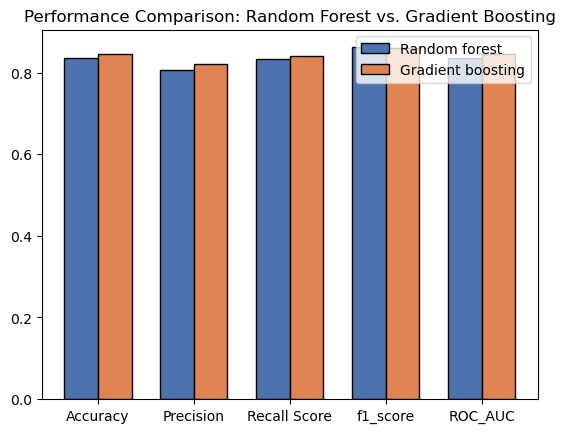

In [92]:
bar_width = 0.35        # Set the width of the bars

# Set the positions of the bars on the x-axis
r1 = range(len(metrics))
r2 = []
for i in r1:
    r2.append(i + bar_width)
#r2 = [x + bar_width for x in r1]      #List comprehension

plt.bar(r1, rf_scores, width = bar_width, edgecolor='black', label = 'Random forest')
plt.bar(r2, gb_scores ,width = bar_width, edgecolor='black', label = 'Gradient boosting')
plt.title('Performance Comparison: Random Forest vs. Gradient Boosting')
plt.xticks([i + bar_width/2 for i in range(len(metrics))],metrics)
plt.legend()

In [93]:
r1

range(0, 5)

In [94]:
r2

[0.35, 1.35, 2.35, 3.35, 4.35]